## Section 1: Data Preprocessing

Kaggle Dataset Link: [Breast Cancer Diagnostic Data](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

### Upload and load the dataset

In [2]:
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Analyzing dataset

In [4]:
#Display the number of rows and columns
df.shape

print("Row Count for the dataset: " + format(df.shape[0]))
print("Column Count for the dataset: " + format(df.shape[1]))

Row Count for the dataset: 569
Column Count for the dataset: 33


In [5]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Select caterogical columns from the datset
df.select_dtypes(include = 'object').columns

Index(['diagnosis'], dtype='object')

In [7]:
df.select_dtypes(include = ['float64', 'int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
print(f"Count of columns with categorical datatype : ", len(df.select_dtypes(include = 'object').columns))
print(f"Count of columns with numerical datatype : ", len(df.select_dtypes(include = ['float64', 'int64']).columns))

Count of columns with categorical datatype :  1
Count of columns with numerical datatype :  32


In [9]:
#Statistical Summary
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Dealing with missing values

In [11]:
df.isnull().values.any()

True

In [12]:
#True means there are missing values in this dataset
df.isnull().values.sum()

569

In [13]:
df.columns[df.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [14]:
#Checking how many columns are there with null values
len(df.columns[df.isnull().any()])

1

In [15]:
#Checking if the column has any non null values
df['Unnamed: 32'].count()

0

In [16]:
#Remove the column and save it
df = df.drop(columns = 'Unnamed: 32')

In [17]:
#Now there are no null values in the dataset
df.isnull().values.any()

False

In [18]:
df.shape

(569, 32)

### Dealing with categorical data

In [19]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [20]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [21]:
df['diagnosis'].nunique()

2

In [22]:
#Creating dummy variable out of the categorical column
df = pd.get_dummies(data = df, drop_first= True)

In [23]:
#Encoded col is created
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Countplot

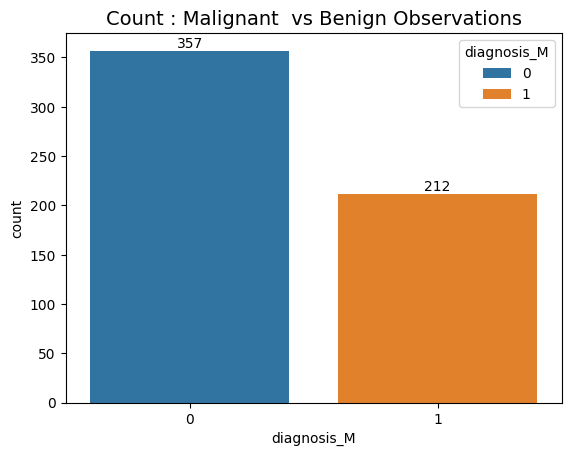

In [24]:
ax = sns.countplot(x = df['diagnosis_M'], hue = df['diagnosis_M'])
for label in ax.containers:
  ax.bar_label(label)
plt.title("Count : Malignant  vs Benign Observations", font = 'sans serif', fontsize = 14, color = 'black')
plt.show()

In [25]:
# B (0) Count
(df.diagnosis_M == 0).sum()

357

In [26]:
# M (1) Count
(df.diagnosis_M == 1).sum()

212

In [27]:
count = df['diagnosis_M'].value_counts().sort_values(ascending = True)
count

1    212
0    357
Name: diagnosis_M, dtype: int64

### Correlation Matrix and Heatmap

In [28]:
#Drop the dependent variable
newdf = df.drop(columns = 'diagnosis_M')
newdf.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


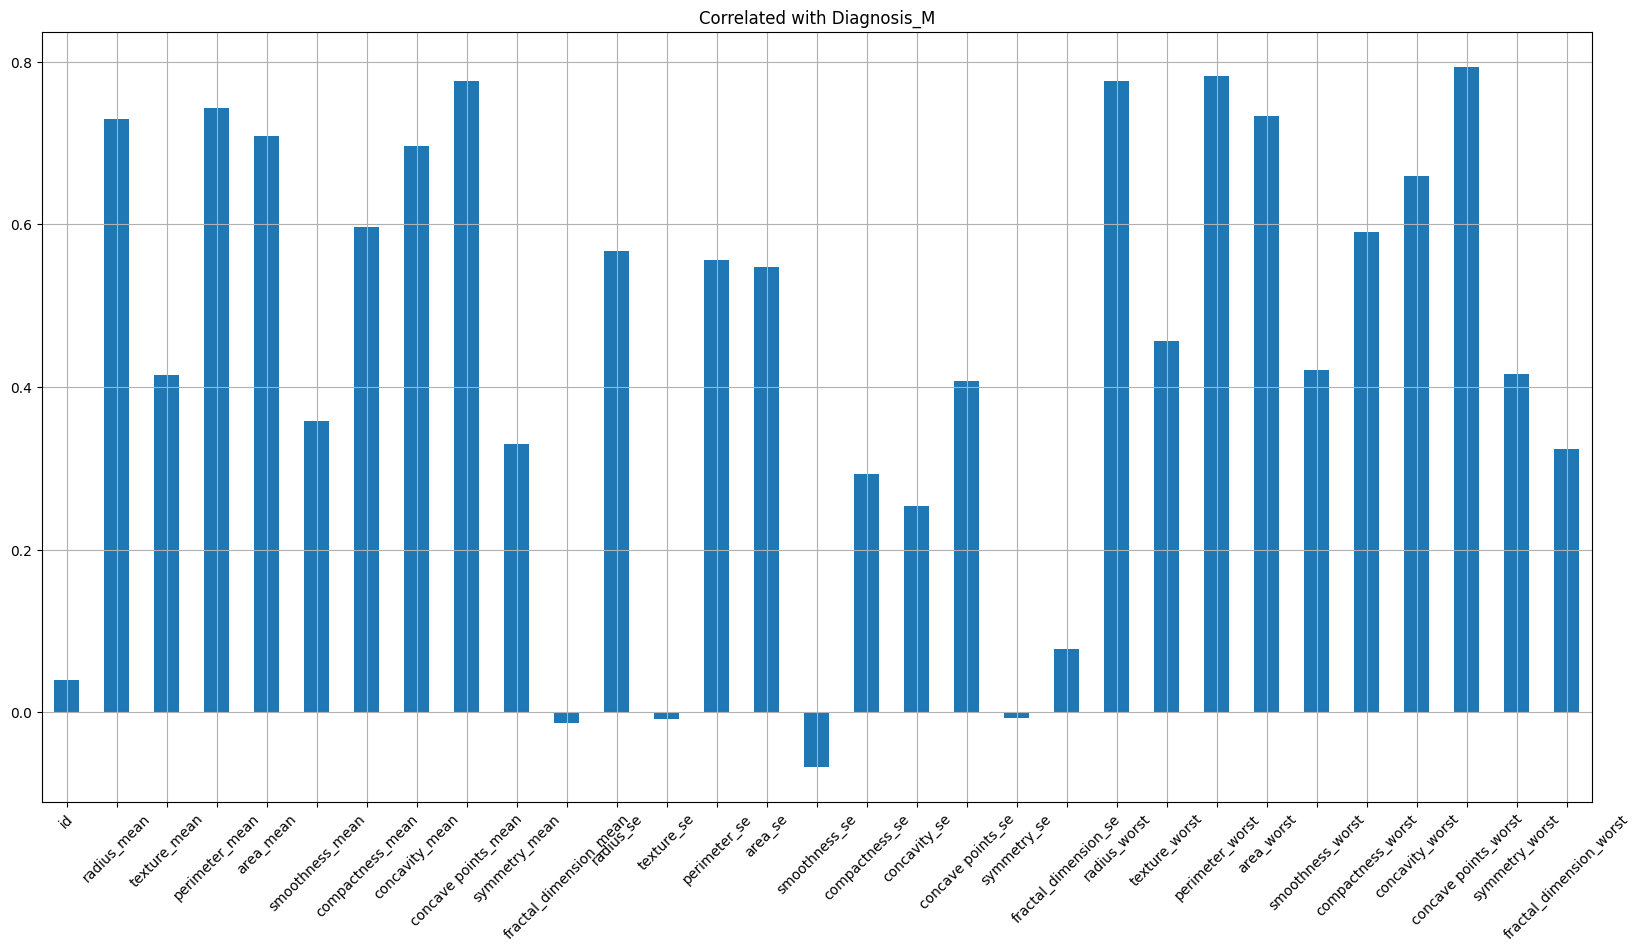

In [29]:
newdf.corrwith(df['diagnosis_M']).plot.bar(
    figsize = (20,10), title = 'Correlated with Diagnosis_M', rot = 45, grid = True
)
plt.show()

In [30]:
#Correlation Matrix
corr = df.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


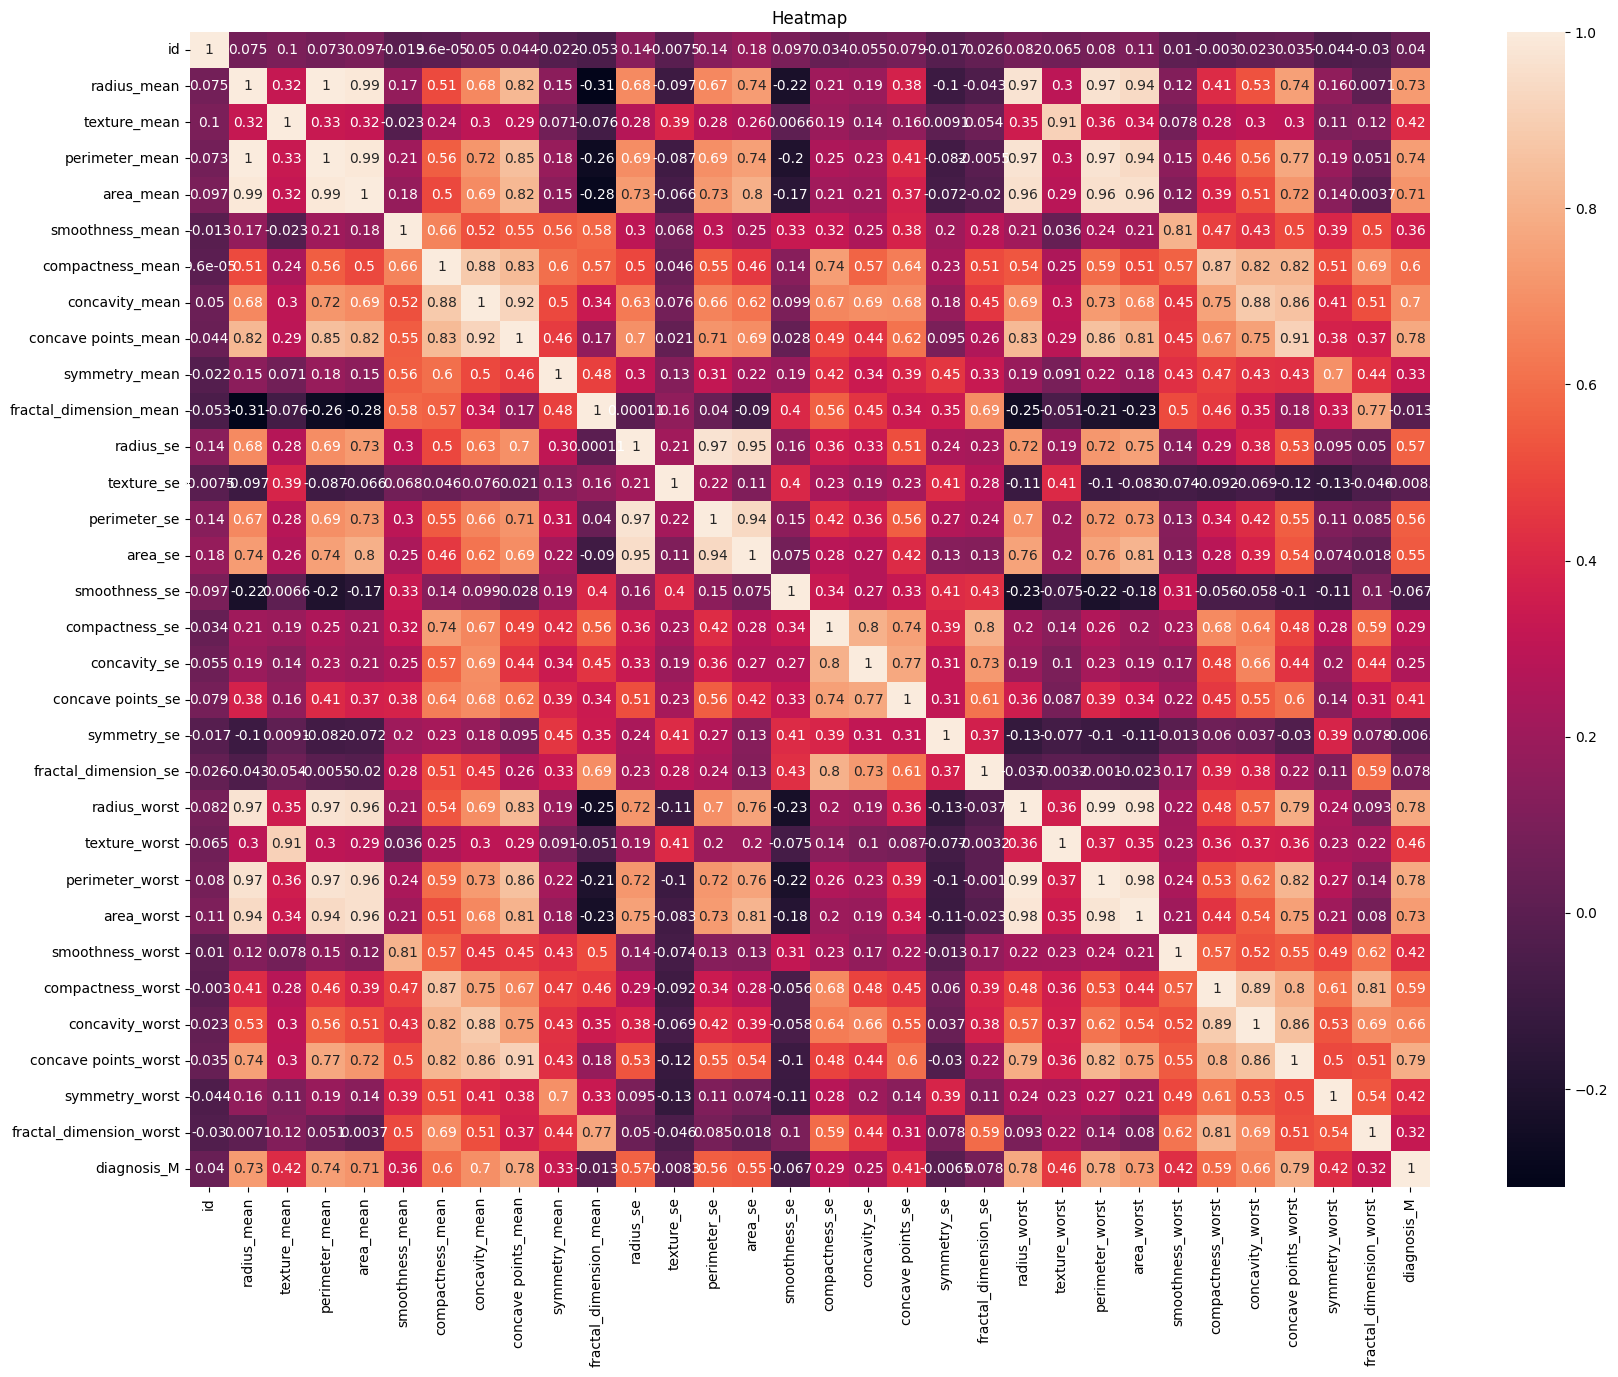

In [31]:
plt.figure(figsize = (20,15))
sns.heatmap(corr, annot = True)
plt.title("Heatmap")
plt.show()

### Splitting dataset into train and test sets

In [32]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [33]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

In [34]:
#Matrix of features/independent variables
x = df.iloc[:, 1:-1].values
x.shape

(569, 30)

In [35]:
#Target variable/dependent variable
y = df.iloc[:, -1].values
y.shape

(569,)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30)

In [37]:
x_train.shape

(398, 30)

In [38]:
y_train.shape

(398,)

In [39]:
x_test.shape

(171, 30)

In [40]:
y_test.shape

(171,)

###Feature Scaling

In [41]:
sc = StandardScaler()

In [42]:
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [43]:
scaled_x_train

array([[-1.8669457 ,  1.19888426, -1.86816226, ..., -1.74570183,
        -0.0558651 , -0.72753947],
       [ 1.77020756,  1.72101155,  1.76164671, ...,  1.53563686,
         0.59506983, -0.40659193],
       [ 0.3375668 ,  1.36532658,  0.43717689, ...,  1.3404643 ,
         1.82533686,  0.80792118],
       ...,
       [-0.72375686,  0.16830989, -0.71337692, ..., -0.50757589,
         0.48929291,  0.30674509],
       [ 1.632791  ,  0.12270925,  1.63470072, ...,  2.07693577,
        -0.25440026,  2.48247715],
       [ 0.08027622, -0.62514118,  0.08807542, ...,  0.41034506,
         0.24031029,  0.20607689]])

In [44]:
scaled_x_test

array([[ 0.99248829,  0.00870766,  0.97458158, ...,  1.21085752,
         0.03689313, -0.27940362],
       [-0.57172151, -1.36615152, -0.54961659, ..., -0.49735983,
         0.91728263,  0.46424211],
       [ 0.58900988,  0.51487472,  0.59797515, ...,  0.25481693,
         0.93518334, -0.41362788],
       ...,
       [ 1.20007501,  0.15918976,  1.16500056, ...,  1.20018402,
         0.25658367, -0.00824895],
       [-0.82024083,  0.45103383, -0.82889777, ..., -0.48348428,
        -0.12421327,  0.24288032],
       [ 2.03334566,  0.28231148,  1.94783416, ...,  1.73080943,
        -1.03714952, -0.5186259 ]])

## Section 2: Model Building

### 1) Logistic Regression

In [45]:
lr_classifier = LogisticRegression(random_state= 0)

In [46]:
lr_classifier.fit(scaled_x_train, y_train)

LogisticRegression(random_state=0)

In [47]:
y_pred = lr_classifier.predict(scaled_x_test)

In [48]:
acc= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [49]:
results = pd.DataFrame( [['Logistic Regression', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score']
)

In [50]:
results

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.982456,0.976,0.968254,0.983871


In [51]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107   2]
 [  1  61]]


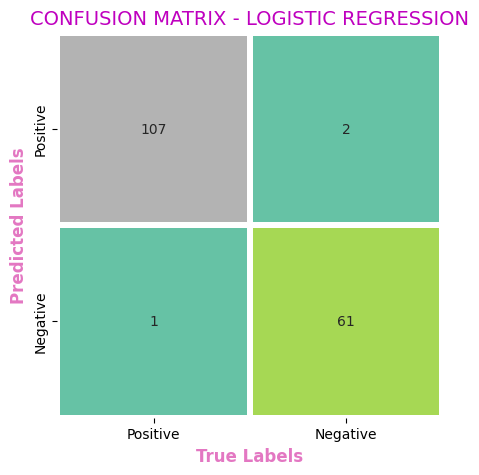

In [52]:
#Confusion matrix
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True
            )
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX - LOGISTIC REGRESSION", fontsize = 14, color = 'm')
plt.show()

### Cross Validation

In [53]:
acc_val = cross_val_score(estimator= lr_classifier, X = scaled_x_train, y = y_train, cv= 10)

In [54]:
print("Accuracy is {:.2f}%".format(acc_val.mean()*100))
print("Standard Deviation is {:.2f}%".format(acc_val.std()*100))

Accuracy is 97.74%
Standard Deviation is 2.61%


### 2) Random Forest Algorithm

In [55]:
rf_classifier = RandomForestClassifier(random_state = 0)

In [56]:
rf_classifier.fit(scaled_x_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
y_pred = rf_classifier.predict(scaled_x_test)

In [58]:
acc= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [59]:
model_results = pd.DataFrame([['Random Forest Algorithm', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score']
)

In [60]:
results = pd.concat([results,model_results], ignore_index = True)

In [61]:
results

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.982456,0.976000,0.968254,0.983871
1,Random Forest Algorithm,0.976608,0.967213,0.983333,0.951613


In [62]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108   1]
 [  3  59]]


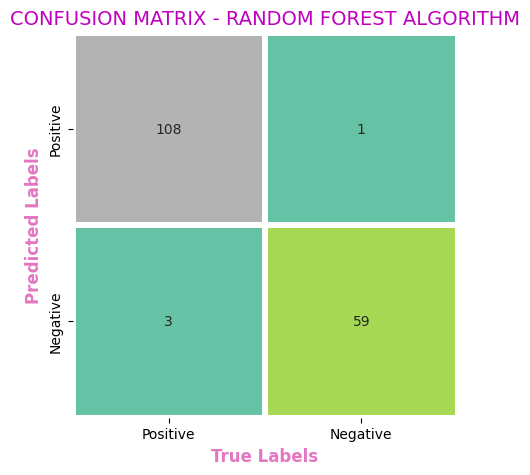

In [63]:
#Confusion matrix
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['Positive', 'Negative'],
            yticklabels = ['Positive','Negative'], square = True
            )
plt.xlabel("True Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 12, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX - RANDOM FOREST ALGORITHM", fontsize = 14, color = 'm')
plt.show()

### Cross Validation

In [64]:
acc_val = cross_val_score(estimator= rf_classifier, X = scaled_x_train, y = y_train, cv= 10)

In [65]:
print("Accuracy is {:.2f}%".format(acc_val.mean()*100))
print("Standard Deviation is {:.2f}%".format(acc_val.std()*100))

Accuracy is 96.98%
Standard Deviation is 2.19%


## Section 3: Randomized Search to find the best parameters (Logistic Regression)

In [66]:
parameters = { 'C' : [ 0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0],
               'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty': ['l2'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga','newton-cg'],
}

In [67]:
parameters

{'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'penalty': ['l2'],
 'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg']}

In [68]:
random_search = RandomizedSearchCV(estimator = lr_classifier, param_distributions= parameters, n_iter = 10,
                                   scoring = 'roc_auc', n_jobs = -1, cv=10, verbose =3, error_score = 'raise' )

In [69]:
random_search.fit(scaled_x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=LogisticRegression(random_state=0), n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear', 'sag',
                                                   'saga', 'newton-cg']},
                   scoring='roc_auc', verbose=3)

In [70]:
random_search.best_estimator_

LogisticRegression(C=0.25, random_state=0, solver='liblinear')

In [71]:
random_search.best_score_

0.9975555555555555

In [72]:
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.25}

## Section 4: Final Model: Logistic Regression



In [74]:
classifier = LogisticRegression(C=0.25, random_state=0, solver='liblinear')
classifier.fit(scaled_x_train, y_train)

LogisticRegression(C=0.25, random_state=0, solver='liblinear')

In [75]:
y_pred = classifier.predict(scaled_x_test)

In [76]:
acc= accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_results = pd.DataFrame([['Final Logistic Regression', acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score']
)
results = pd.concat([results,model_results], ignore_index = True)

In [77]:
results

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.982456,0.976000,0.968254,0.983871
1,Random Forest Algorithm,0.976608,0.967213,0.983333,0.951613
2,Final Logistic Regression,0.988304,0.983871,0.983871,0.983871


### Cross Validation

In [78]:
finalacc = cross_val_score(estimator= classifier, X = scaled_x_train, y = y_train, cv= 10)
print("Accuracy is {:.2f}%".format(finalacc.mean()*100))
print("Standard Deviation is {:.2f}%".format(finalacc.std()*100))

Accuracy is 97.99%
Standard Deviation is 1.87%


## Section 5: Predicting a single observation

In [79]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [80]:
single_obs = [[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760,	0.3001,	0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904,	0.05373, 0.01587, 0.03003, 0.006193, 25.38,
17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

In [81]:
single_obs

[[17.99,
  10.38,
  122.8,
  1001.0,
  0.1184,
  0.2776,
  0.3001,
  0.1471,
  0.2419,
  0.07871,
  1.095,
  0.9053,
  8.589,
  153.4,
  0.006399,
  0.04904,
  0.05373,
  0.01587,
  0.03003,
  0.006193,
  25.38,
  17.33,
  184.6,
  2019.0,
  0.1622,
  0.6656,
  0.7119,
  0.2654,
  0.4601,
  0.1189]]

In [82]:
#Model has predicted that this obs is Malignant
classifier.predict(sc.transform(single_obs))

array([1], dtype=uint8)